In [25]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# location to save figures
import os
cwd = os.getcwd()
figure_path = cwd + '/figures/'

# ECO Mocks

In [27]:
# load halo catalog

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from halotools import sim_manager
simname = 'vishnu_130'
halocat = sim_manager.CachedHaloCatalog(simname = simname, redshift=0.0, dz_tol = 0.1,
                                        version_name='custom', halo_finder='Rockstar')

In [28]:
# define galaxy-halo connection
from halotools.empirical_models import SubhaloModelFactory
from eco_mocks.sham_model import DeconvolveSHAM, HaloProps, CAMGalProp
from eco_mocks.galaxy_abundance_functions import Eckert_2016_phi

# define primary galaxy property abundance function
phi = Eckert_2016_phi(sample='RESOLVE-B SMF single')

# define stellar mass model
sm_model =  DeconvolveSHAM(stellar_mass_function = phi, scatter=0.15,
                           prim_galprop='stellar_mass', prim_haloprop='halo_vpeak', Lbox=halocat.Lbox)

# carry over some halo properties to the mock table
additional_halo_properties = HaloProps()

# define color model
from eco_mocks.galaxy_secondary_functions import prim_prop_nn
color_dist = prim_prop_nn(prim_prop='stellar_mass', sec_prop='u_minus_r')
color_model = CAMGalProp('stellar_mass',
                         10**np.arange(-1,12,0.1),
                         secondary_galprop='u_minus_r',
                         conditional_rvs=color_dist.rvs)

model_instance = SubhaloModelFactory(stellar_mass = sm_model,
                                     haloprops = additional_halo_properties,
                                     galaxy_color=color_model)

In [29]:
# populate mock catalog
model_instance.populate_mock(halocat)
mock = model_instance.mock.galaxy_table
mock = mock[np.log10(mock['stellar_mass'])>8]

Error automatically detecting Lbox.


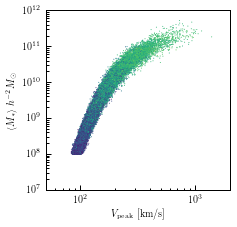

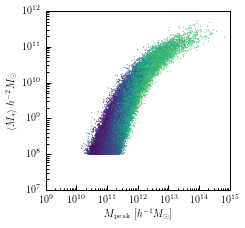

In [30]:
# plot stellar mass-vpeak relation
plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['halo_vpeak'], mock['stellar_mass'], c=mock['u_minus_r'], s=1, lw=0)
plt.ylabel(r'$\langle M_{*}\rangle~h^{-2}M_{\odot}$')
plt.ylim([10**7.0,10**12.0])
plt.xlim([50,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$V_{\rm peak}~[{\rm km/s}]$')
plt.show()

# plot SMHM relation
plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['halo_mpeak'], mock['stellar_mass'], c=mock['u_minus_r'], s=1, lw=0)
plt.ylabel(r'$\langle M_{*}\rangle~h^{-2}M_{\odot}$')
plt.ylim([10**7.0,10**12.0])
plt.xlim([10**9,10**15])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{\rm peak}~[h^{-1}M_{\odot}]$')
plt.show()

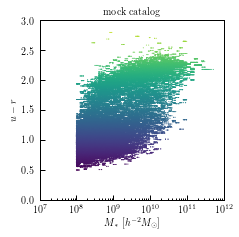

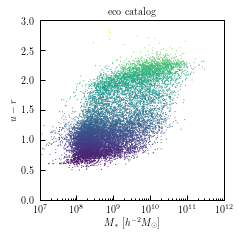

In [32]:
# plot stellar mass-vpeak relation

# mock catalog
plt.figure(figsize=(3.3,3.3))
plt.title('mock catalog')
plt.scatter(mock['stellar_mass'],mock['u_minus_r'], c=mock['u_minus_r'], s=1, lw=0)
plt.ylabel(r'$u-r$')
plt.ylim([0,3])
plt.xlim([10**7.0,10**12.0])
plt.xscale('log')
plt.xlabel(r'$M_{*}~[h^{-2}M_{\odot}]$')
plt.show()

from eco_mocks.eco_galaxy_properties import eco_table

# eco catalog
plt.figure(figsize=(3.3,3.3))
plt.title('eco catalog')
plt.scatter(eco_table['stellar_mass'], eco_table['u_minus_r'], c=eco_table['u_minus_r'], s=1, lw=0)
plt.ylabel(r'$u-r$')
plt.ylim([0,3])
plt.xlim([10**7.0,10**12.0])
plt.xscale('log')
plt.xlabel(r'$M_{*}~[h^{-2}M_{\odot}]$')
plt.show()